In [1]:
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords



# Cargando el Dataset

In [2]:

df = pd.read_csv("tw_source.csv", encoding='ISO-8859-1', header=None, names=["target", "ID", "Timestamp", "Query", "username", "tweet"])

In [3]:
df

,target,ID,Timestamp,Query,username,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


# Extraendo los nombres de usuario usando expresiones regulares

In [4]:

usernames = df['tweet'].str.extract(r'@(\w+)')


# Contando la cantidad de menciones de cada usuario 

In [5]:

user_counts = usernames[0].value_counts()

# Obteniendo los 3 usuarios mas populares

In [6]:
# Obtener los 3 usuarios más populares
top_users = user_counts.head(3)

print(top_users)

mileycyrus    4310
tommcfly      3767
ddlovato      3259
Name: 0, dtype: int64


In [7]:

selected_users = top_users.index.tolist()
filtered_df = df[df['tweet'].str.extract(r'@(\w+)')[0].isin(selected_users)]


In [8]:
corpus_users = {}

for user in selected_users:
    user_tweets = filtered_df[filtered_df['tweet'].str.extract(r'@(\w+)')[0] == user]
    user_corpus = {
        'Content': user_tweets['tweet'].tolist(),
        'Metadata': {
            'ID': user_tweets['ID'].tolist(),
            'Timestamp': user_tweets['Timestamp'].tolist(),
            'Length': user_tweets['tweet'].apply(len).tolist()
        }
    }
    corpus_users[user] = user_corpus


# Tokenizacion y creando wordcloud

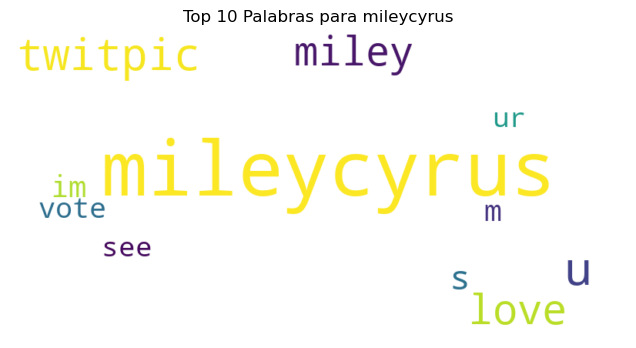

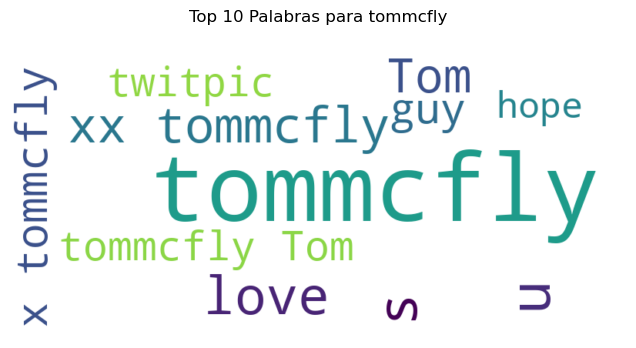

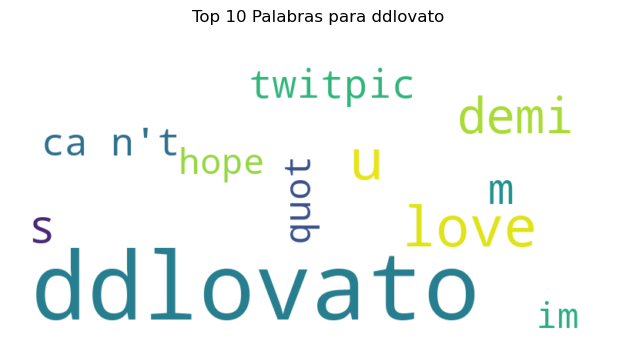

In [9]:



for user, corpus in corpus_users.items():
    # Unir todos los tweets en un solo texto
    text = ' '.join(corpus['Content'])

    # Tokenización y eliminación de stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    words = [word for word in words if word.lower() not in stop_words]

    # Crear un WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=11).generate(' '.join(words))

    # Mostrar el WordCloud
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Top 10 Palabras para {user}')
    plt.show()


# Creando un Dataframe para cada usuario con las palabras y su frecuencia

In [10]:

word_freq_data = {}
for user, corpus in corpus_users.items():
    text = ' '.join(corpus['Content'])
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalnum() and word.lower() not in stopwords.words('english')]
    word_freq = pd.Series(words).value_counts().reset_index()
    word_freq.columns = ['Word', 'Frequency']
    word_freq_data[user] = word_freq


# Mostrando las 10 palabras mas frecuentes en forma de tabla para cada usuario

In [11]:


for user, word_freq in word_freq_data.items():
    print(f"Palabras más frecuentes para {user}:")
    print(word_freq.head(11))
    print()




Palabras más frecuentes para mileycyrus:
          Word  Frequency
0   mileycyrus       4326
1        miley        851
2         love        820
3            u        642
4         http        539
5         good        321
6         quot        290
7         hope        274
8       please        273
9           im        256
10        come        252

Palabras más frecuentes para tommcfly:
        Word  Frequency
0   tommcfly       3773
1        tom        703
2     please        478
3       love        398
4          u        348
5         xx        298
6       come        285
7        say        284
8          x        267
9       guys        266
10      good        262

Palabras más frecuentes para ddlovato:
        Word  Frequency
0   ddlovato       3271
1       demi        595
2       love        551
3          u        434
4     please        296
5       come        254
6       wish        241
7       http        241
8       quot        240
9        see        236
10      hope   

# Creando tabla con las palabras mas frecuentes de los tres usuario Elegidos


In [12]:

# Importar NLTK
import nltk
# Definir los usuarios más popuio2lares
top_users = ['mileycyrus ', 'tommcfly ', 'ddlovato ']  



nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_tweet(tweet):
    tweet = re.sub(r'@[A-Za-z0-9_]+', '', tweet)  # Eliminando menciones a usuarios
    tweet = re.sub(r'https?://[A-Za-z0.9./]+', '', tweet)  # Eliminando URLs
    tweet = re.sub(r'[^A-Za-z]+', ' ', tweet)  # Eliminando caracteres no alfabéticos
    tweet = tweet.lower()  # Convertir a minúsculas
    tokens = word_tokenize(tweet)
    tokens = [ps.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Creando un DataFrame para almacenar las palabras más frecuentes
top_words_df = pd.DataFrame()

# Generar wordcloud y contar palabras para cada usuario
for user in top_users:
    user_tweets = df[df['tweet'].str.contains(f'@{user}')]
    user_corpus = user_tweets['tweet'].apply(preprocess_tweet)
    
    # Generar wordcloud
    user_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(user_corpus))
    
    # Contar palabras más frecuentes
    words = ' '.join(user_corpus).split()
    word_counts = pd.Series(words).value_counts().head(11)
    
    # Almacenar los resultados en el DataFrame
    top_words_df[user] = word_counts.index

# Mostrar el DataFrame con las palabras más frecuentes
print(top_words_df)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gehov\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gehov\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


   mileycyrus  tommcfly  ddlovato 
0        miley       tom      love
1         love      love      demi
2            u     pleas         u
3         vote         u      come
4         good      come     pleas
5         come       say        go
6         hope        xx       see
7        pleas       guy      wish
8           go         x      quot
9           im      good      wait
10        like      quot      hope
